In [ ]:
pip install haystack-ai==2.2.4 haystack-experimental==0.1.0 trafilatura==1.11.0 colorama==0.4.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.8/837.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/

In [ ]:
pip install chroma-haystack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:0

In [ ]:
from typing import List
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator

In [ ]:
from typing import List
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
import os

@component
class SummaryRefiner:
    def __init__(self, max_iterations=3):
        self.max_iterations = max_iterations
        self.current_iteration = 0

    @component.output_types(summary_to_refine=str, final_summary=str)
    def run(self, replies: List[str]):
        self.current_iteration += 1
        if 'FINAL' in replies[0] or self.current_iteration >= self.max_iterations:
            self.current_iteration = 0  # Reset for next document
            return {"final_summary": replies[0].replace('FINAL', '').strip()}
        else:
            print(Fore.RED + f"Refining summary (iteration {self.current_iteration})\n", replies[0])
            return {"summary_to_refine": replies[0]}

template = """
{% if summary_to_refine %}
    Original Text:
    {{ text }}

    Current Summary:
    {{ summary_to_refine[0] }}

    Please refine this summary. Consider the following:
    - Is it concise yet comprehensive?
    - Does it capture the main points of the original text?
    - Is it well-structured and coherent?

    If you believe the summary is optimal, start your response with 'FINAL'.
    Otherwise, provide an improved summary.

    Refined Summary:
{% else %}
    Please summarize the following text in a concise yet comprehensive manner:

    {{ text }}

    Summary:
{% endif %}
"""

prompt_template = PromptBuilder(template=template)

# Replace with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_api_key_here"

llm = OpenAIGenerator(model="gpt-3.5-turbo")
summary_refiner = SummaryRefiner(max_iterations=3)

summarization_pipeline = Pipeline()

summarization_pipeline.add_component("prompt_builder", prompt_template)
summarization_pipeline.add_component("summary_refiner", summary_refiner)
summarization_pipeline.add_component("llm", llm)

summarization_pipeline.connect("prompt_builder.prompt", "llm.prompt")
summarization_pipeline.connect("llm.replies", "summary_refiner.replies")
summarization_pipeline.connect("summary_refiner.summary_to_refine", "prompt_builder.summary_to_refine")

documents = [
    """The Internet of Things (IoT) is a system of interrelated computing devices, mechanical and digital machines, objects, animals or people that are provided with unique identifiers and the ability to transfer data over a network without requiring human-to-human or human-to-computer interaction. The IoT allows objects to be sensed and/or controlled remotely across existing network infrastructure, creating opportunities for more direct integration of the physical world into computer-based systems, and resulting in improved efficiency, accuracy and economic benefit. When IoT is augmented with sensors and actuators, the technology becomes an instance of the more general class of cyber-physical systems, which also encompasses technologies such as smart grids, smart homes, intelligent transportation and smart cities. Each thing is uniquely identifiable through its embedded computing system but is able to interoperate within the existing Internet infrastructure.""",

    """Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals. Some popular accounts use the term "artificial intelligence" to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving", however this definition is rejected by major AI researchers. AI applications include advanced web search engines, recommendation systems (used by YouTube, Amazon and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g. Tesla), automated decision-making and competing at the highest level in strategic game systems (such as chess and Go). As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology."""
]

for doc in documents:
    result = summarization_pipeline.run({"prompt_builder": {"text": doc}})
    final_summary = result['summary_refiner']['final_summary']
    print(Fore.GREEN + f"Final Summary:\n{final_summary}\n")

Refining summary (iteration 1)
 The Internet of Things (IoT) is a network of interconnected devices with unique identifiers that can transfer data without human interaction. This technology allows for remote sensing and control, leading to improved efficiency and integration of the physical world into computer systems. When combined with sensors and actuators, IoT becomes part of cyber-physical systems, including smart grids, homes, transportation, and cities. Each IoT device can communicate over the Internet infrastructure while maintaining its individual identity.
Refining summary (iteration 2)
 The Internet of Things (IoT) is a system where interconnected devices, machines, objects, animals, or people have unique IDs and can share data without human interaction. This enables remote sensing and control, integrating the physical world into computer systems for improved efficiency and economic benefit. IoT, when equipped with sensors and actuators, forms part of cyber-physical systems 

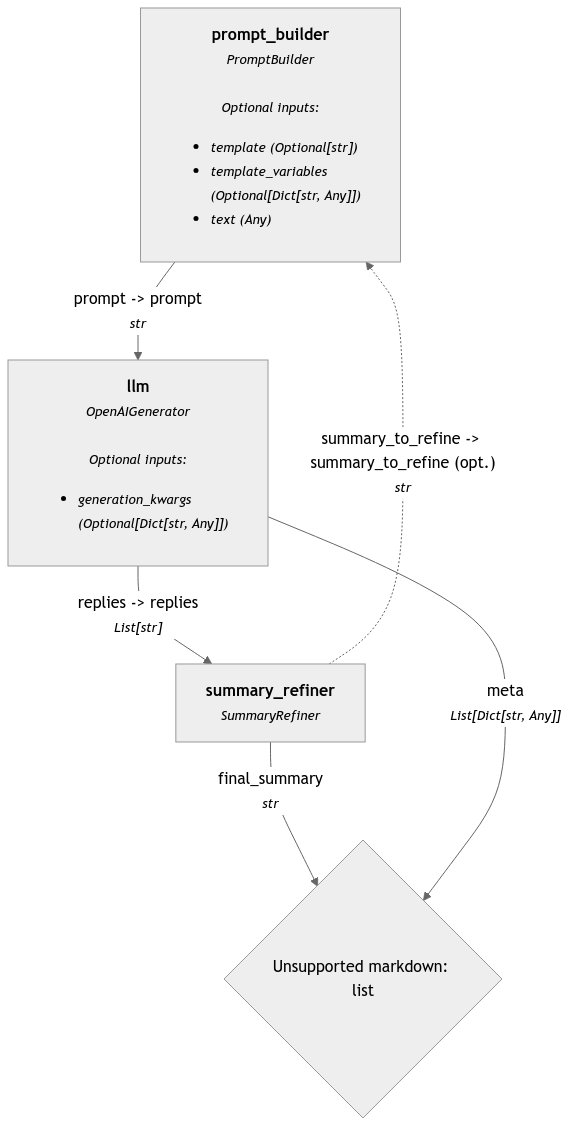

In [ ]:
summarization_pipeline.show()

**Using Chroma Haystack Integration**

In [ ]:
pip install chroma-haystack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:0

In [ ]:
# Two spiritual texts for summarization
import os
from pathlib import Path
from typing import List
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.converters import TextFileToDocument
from haystack.components.writers import DocumentWriter
from haystack_integrations.components.retrievers.chroma import ChromaQueryTextRetriever
from haystack_integrations.document_stores.chroma import ChromaDocumentStore

@component
class SummaryRefiner:
    def __init__(self, max_iterations=3):
        self.max_iterations = max_iterations
        self.current_iteration = 0

    @component.output_types(summary_to_refine=str, final_summary=str)
    def run(self, replies: List[str]):
        self.current_iteration += 1
        if 'FINAL' in replies[0] or self.current_iteration >= self.max_iterations:
            self.current_iteration = 0  # Reset for next document
            return {"final_summary": replies[0].replace('FINAL', '').strip()}
        else:
            print(Fore.RED + f"Refining summary (iteration {self.current_iteration})\n", replies[0])
            return {"summary_to_refine": replies[0]}

template = """
{% if summary_to_refine %}
    Original Text:
    {{ text }}

    Current Summary:
    {{ summary_to_refine[0] }}

    Please refine this summary. Consider the following:
    - Is it concise yet comprehensive?
    - Does it capture the main points of the original text?
    - Is it well-structured and coherent?

    If you believe the summary is optimal, start your response with 'FINAL'.
    Otherwise, provide an improved summary.

    Refined Summary:
{% else %}
    Please summarize the following text in a concise yet comprehensive manner:

    {{ text }}

    Summary:
{% endif %}
"""

# Replace with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_api_key"

# Set up document store and indexing
document_store = ChromaDocumentStore()

# Use a different way to get the current directory since __file__ is not available
HERE = Path('.').resolve() # Get the current directory
file_paths = [HERE / "data" / Path(name) for name in os.listdir("data")]

indexing = Pipeline()
indexing.add_component("converter", TextFileToDocument())
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("converter", "writer")
indexing.run({"converter": {"sources": file_paths}})

# Set up summarization pipeline
prompt_template = PromptBuilder(template=template)
llm = OpenAIGenerator(model="gpt-3.5-turbo")
summary_refiner = SummaryRefiner(max_iterations=3)

summarization_pipeline = Pipeline()
summarization_pipeline.add_component("retriever", ChromaQueryTextRetriever(document_store))
summarization_pipeline.add_component("prompt_builder", prompt_template)
summarization_pipeline.add_component("summary_refiner", summary_refiner)
summarization_pipeline.add_component("llm", llm)

summarization_pipeline.connect("retriever", "prompt_builder.text")
summarization_pipeline.connect("prompt_builder.prompt", "llm.prompt")
summarization_pipeline.connect("llm.replies", "summary_refiner.replies")
summarization_pipeline.connect("summary_refiner.summary_to_refine", "prompt_builder.summary_to_refine")

# Process each document
for i in range(len(file_paths)):
    result = summarization_pipeline.run(
        {
            "retriever": {"query": f"Document {i+1}", "top_k": 1},
            "prompt_builder": {}
        }
    )
    final_summary = result['summary_refiner']['final_summary']
    print(Fore.GREEN + f"Final Summary for Document {i+1}:\n{final_summary}\n")

Refining summary (iteration 1)
 The text is the Vyādha Gītā, also known as The Butcher's Gita, from the Mahabharata Vana Parva Adhyaya 210. It has been compiled and edited by an individual, with further details available in the given file path.
Refining summary (iteration 2)
 The document is about the Vyādha Gītā, also known as The Butcher's Gita, from the Mahābhārata Vana Parva Adhyāya 210. It is compiled and edited by unknown sources.
Final Summary for Document 1:
The document is about the Vyadha Gita, also known as the Butcher's Gita, from the Mahabharata Vana Parva Adhyaya 210. This text is compiled and edited by an unknown author. The content is stored in a file named 'butchers_gita.txt'.

Refining summary (iteration 1)
 The document is the Vyādha Gita, also known as The Butcher's Gita, from the Mahabharata Vana Parva Adhyaya 210. It is compiled and edited by an unspecified source.
Refining summary (iteration 2)
 The document is a compilation and editing of the Vyadha Gi

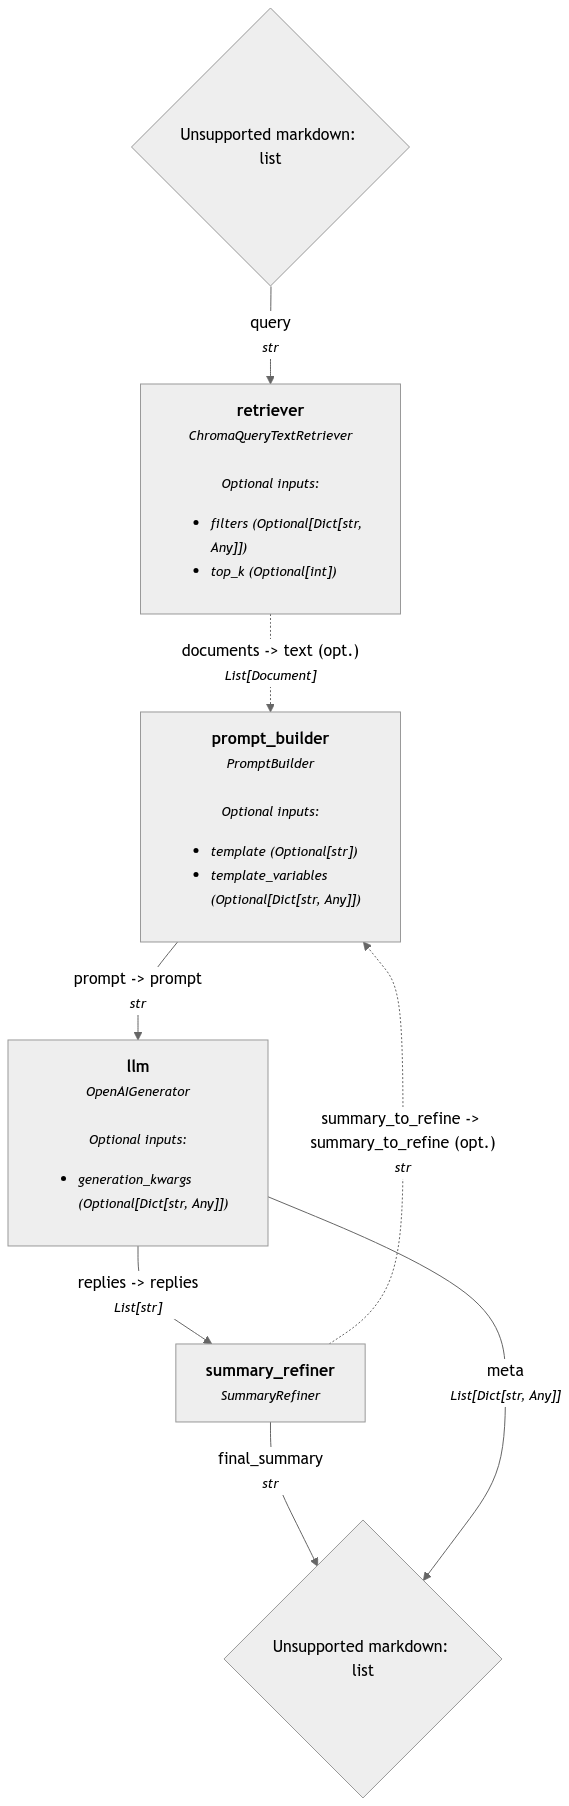

In [ ]:
summarization_pipeline.show()

In [ ]:
# Two spiritual texts summarization using gpt-4o-mini
import os
from pathlib import Path
from typing import List
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.converters import TextFileToDocument
from haystack.components.writers import DocumentWriter
from haystack_integrations.components.retrievers.chroma import ChromaQueryTextRetriever
from haystack_integrations.document_stores.chroma import ChromaDocumentStore

@component
class SummaryRefiner:
    def __init__(self, max_iterations=3):
        self.max_iterations = max_iterations
        self.current_iteration = 0

    @component.output_types(summary_to_refine=str, final_summary=str)
    def run(self, replies: List[str]):
        self.current_iteration += 1
        if 'FINAL' in replies[0] or self.current_iteration >= self.max_iterations:
            self.current_iteration = 0  # Reset for next document
            return {"final_summary": replies[0].replace('FINAL', '').strip()}
        else:
            print(Fore.RED + f"Refining summary (iteration {self.current_iteration})\n", replies[0])
            return {"summary_to_refine": replies[0]}

template = """
{% if summary_to_refine %}
    Original Text:
    {{ text }}

    Current Summary:
    {{ summary_to_refine[0] }}

    Please refine this summary. Consider the following:
    - Is it concise yet comprehensive?
    - Does it capture the main points of the original text?
    - Is it well-structured and coherent?

    If you believe the summary is optimal, start your response with 'FINAL'.
    Otherwise, provide an improved summary.

    Refined Summary:
{% else %}
    Please summarize the following text in a concise yet comprehensive manner:

    {{ text }}

    Summary:
{% endif %}
"""

# Replace with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_api_key_here"

# Set up document store and indexing
document_store = ChromaDocumentStore()

HERE = Path('.').resolve() # Get the current directory
file_paths = [HERE / "data" / Path(name) for name in os.listdir("data")]

indexing = Pipeline()
indexing.add_component("converter", TextFileToDocument())
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("converter", "writer")
indexing.run({"converter": {"sources": file_paths}})

# Set up summarization pipeline
prompt_template = PromptBuilder(template=template)
llm = OpenAIGenerator(model="gpt-4o-mini")
summary_refiner = SummaryRefiner(max_iterations=3)

summarization_pipeline = Pipeline()
summarization_pipeline.add_component("retriever", ChromaQueryTextRetriever(document_store))
summarization_pipeline.add_component("prompt_builder", prompt_template)
summarization_pipeline.add_component("summary_refiner", summary_refiner)
summarization_pipeline.add_component("llm", llm)

summarization_pipeline.connect("retriever.documents", "prompt_builder.text")
summarization_pipeline.connect("prompt_builder.prompt", "llm.prompt")
summarization_pipeline.connect("llm.replies", "summary_refiner.replies")
summarization_pipeline.connect("summary_refiner.summary_to_refine", "prompt_builder.summary_to_refine")

# Retrieve all documents from the store
all_docs = document_store.filter_documents()

# Process each document
for i, doc in enumerate(all_docs):
    result = summarization_pipeline.run(
        {
            "retriever": {"query": doc.content, "top_k": 1}
        }
    )
    final_summary = result['summary_refiner']['final_summary']
    print(Fore.GREEN + f"Final Summary for Document {i+1}:\n{final_summary}\n")

Refining summary (iteration 1)
 The text is an introduction to the "Bhagavad Gita" by Sri Swami Sivananda, who is the founder of The Divine Life Society. The document emphasizes the significance of the Gita in spiritual teachings.
Refining summary (iteration 2)
 The original text references the "Bhagavad Gita," presented by Sri Swami Sivananda, who is the founder of The Divine Life Society. The content likely relates to spiritual teachings and philosophy as articulated in this revered Hindu scripture. 

This summary maintains conciseness while capturing the essence and authorship of the document.

Refined Summary: 
The original text discusses the "Bhagavad Gita," authored by Sri Swami Sivananda, the founder of The Divine Life Society, focusing on its spiritual teachings and philosophies.
Final Summary for Document 1:
The provided document is an excerpt from the "Bhagavad Gita," attributed to Sri Swami Sivananda, who is the founder of The Divine Life Society. It indicates the text's ori

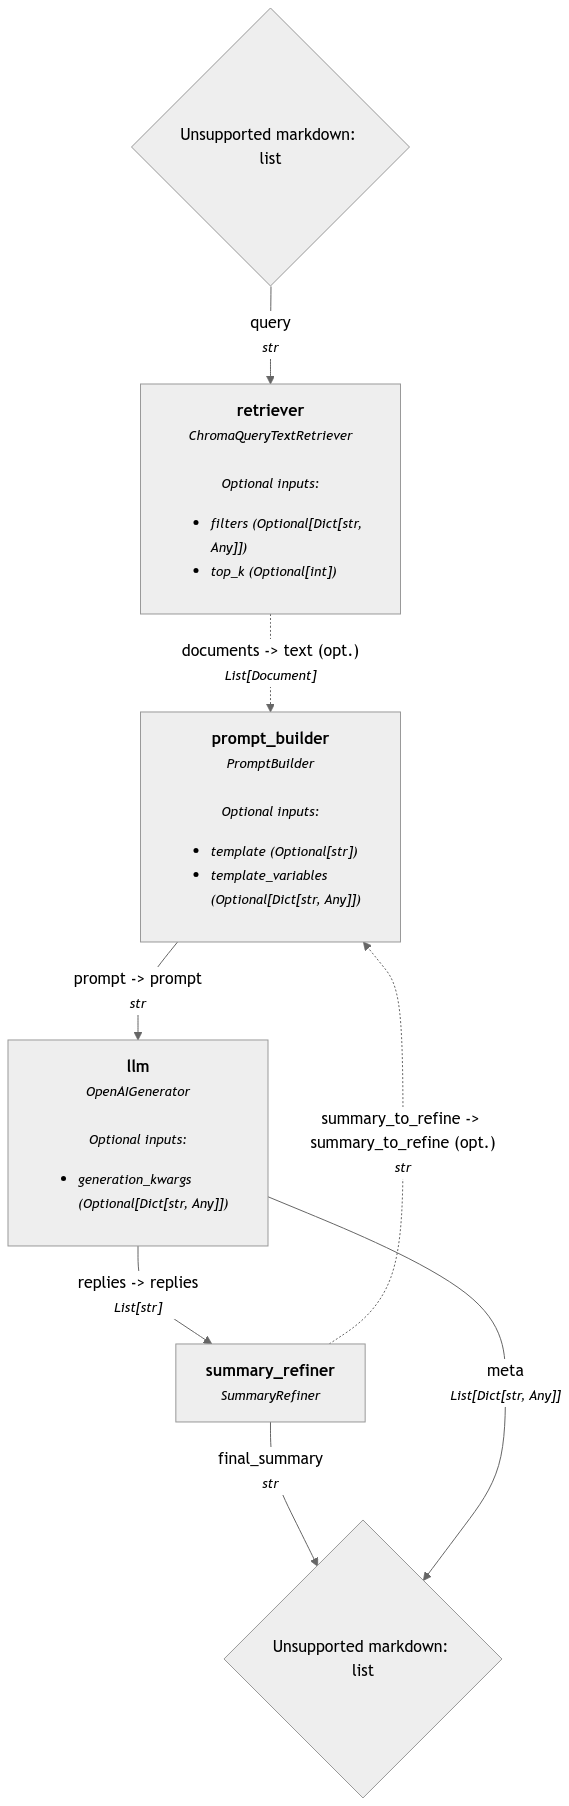

In [ ]:
summarization_pipeline.show()

**Automated Essay Grading with Haystack: A Self-Reflecting Pipeline**

In [ ]:
import os
from pathlib import Path
from typing import List
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.converters import TextFileToDocument
from haystack.components.writers import DocumentWriter
from haystack_integrations.components.retrievers.chroma import ChromaQueryTextRetriever
from haystack_integrations.document_stores.chroma import ChromaDocumentStore

@component
class EssayFeedbackRefiner:
    def __init__(self, max_iterations=3):
        self.max_iterations = max_iterations
        self.current_iteration = 0

    @component.output_types(feedback_to_refine=str, final_feedback=str)
    def run(self, replies: List[str]):
        self.current_iteration += 1
        if 'FINAL' in replies[0] or self.current_iteration >= self.max_iterations:
            self.current_iteration = 0  # Reset for next essay
            return {"final_feedback": replies[0].replace('FINAL', '').strip()}
        else:
            print(Fore.RED + f"Refining feedback (iteration {self.current_iteration})\n", replies[0])
            return {"feedback_to_refine": replies[0]}

template = """
{% if feedback_to_refine %}
    Essay Text:
    {{ text }}

    Current Feedback:
    {{ feedback_to_refine[0] }}

    Please refine this feedback. Consider the following:
    - Is the feedback specific and actionable?
    - Does it address the essay's strengths and weaknesses?
    - Is it constructive and encouraging?
    - Does it provide a clear grade (A, B, C, D, or F) with justification?

    If you believe the feedback is optimal, start your response with 'FINAL'.
    Otherwise, provide improved feedback.

    Refined Feedback:
{% else %}
    Please grade and provide feedback for the following essay:

    {{ text }}

    Provide a comprehensive evaluation including:
    1. Overall grade (A, B, C, D, or F)
    2. Strengths of the essay
    3. Areas for improvement
    4. Specific suggestions for enhancing the essay
    5. Comments on structure, argumentation, and use of evidence

    Feedback:
{% endif %}
"""

# Replace with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "Your_api_key_here"

# Set up document store and indexing
document_store = ChromaDocumentStore()

HERE = Path('.').resolve() # Get the current directory
file_paths = [HERE / "essays" / Path(name) for name in os.listdir("essays")]

indexing = Pipeline()
indexing.add_component("converter", TextFileToDocument())
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("converter", "writer")
indexing.run({"converter": {"sources": file_paths}})

# Set up essay grading pipeline
prompt_template = PromptBuilder(template=template)
llm = OpenAIGenerator(model="gpt-3.5-turbo")
feedback_refiner = EssayFeedbackRefiner(max_iterations=3)

grading_pipeline = Pipeline()
grading_pipeline.add_component("retriever", ChromaQueryTextRetriever(document_store))
grading_pipeline.add_component("prompt_builder", prompt_template)
grading_pipeline.add_component("feedback_refiner", feedback_refiner)
grading_pipeline.add_component("llm", llm)

grading_pipeline.connect("retriever.documents", "prompt_builder.text")
grading_pipeline.connect("prompt_builder.prompt", "llm.prompt")
grading_pipeline.connect("llm.replies", "feedback_refiner.replies")
grading_pipeline.connect("feedback_refiner.feedback_to_refine", "prompt_builder.feedback_to_refine")

# Retrieve all documents from the store
all_essays = document_store.filter_documents()

# Process each essay
for i, essay in enumerate(all_essays):
    result = grading_pipeline.run(
        {
            "retriever": {"query": essay.content, "top_k": 3}
        }
    )
    final_feedback = result['feedback_refiner']['final_feedback']
    print(Fore.GREEN + f"Final Feedback for Essay {i+1}:\n{final_feedback}\n")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 32.3MiB/s]


Refining feedback (iteration 1)
 Overall Grade: B

Strengths of the essay:
1. The essay effectively discusses the impact of social media on society.
2. The writer presents clear examples to support their points.
3. The introduction and conclusion are well-written and help to tie the essay together.

Areas for improvement:
1. The essay could benefit from further analysis and exploration of the nuances of social media's impact on society.
2. The essay could delve deeper into potential negative effects of social media, in addition to the positive aspects discussed.
3. The essay could be more organized, with clearer transitions between paragraphs.

Specific suggestions for enhancing the essay:
1. Consider incorporating more research and statistics to support the arguments made in the essay.
2. Expand on the discussion of how social media affects various aspects of society, such as communication, mental health, or politics.
3. Work on improving the flow of the essay by ensuring smooth trans

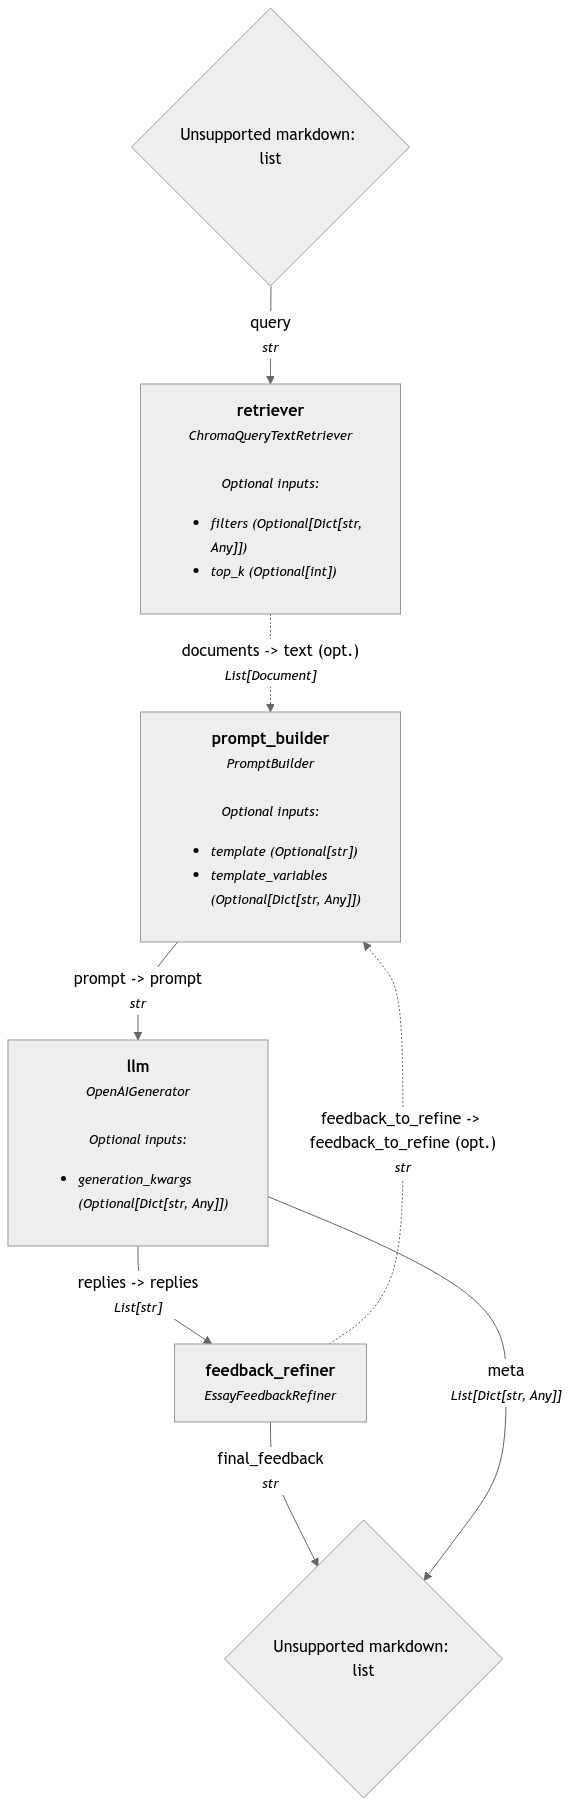

In [ ]:
grading_pipeline.show()

In [ ]:
# This code is for fixing the unsupported markdown list

In [ ]:
import os
from pathlib import Path
from typing import List, Dict
from colorama import Fore
from haystack import Pipeline, component
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.converters import TextFileToDocument
from haystack.components.writers import DocumentWriter
from haystack_integrations.components.retrievers.chroma import ChromaQueryTextRetriever
from haystack_integrations.document_stores.chroma import ChromaDocumentStore
from haystack.dataclasses import Document

@component
class EssayFeedbackRefiner:
    def __init__(self, max_iterations=3):
        self.max_iterations = max_iterations
        self.current_iteration = 0

    @component.output_types(feedback_to_refine=str, final_feedback=str)
    def run(self, replies: List[str]) -> Dict[str, str]:
        self.current_iteration += 1
        if 'FINAL' in replies[0] or self.current_iteration >= self.max_iterations:
            self.current_iteration = 0  # Reset for next essay
            return {"final_feedback": replies[0].replace('FINAL', '').strip()}
        else:
            print(Fore.RED + f"Refining feedback (iteration {self.current_iteration})\n", replies[0])
            return {"feedback_to_refine": replies[0]}

template = """
{% if feedback_to_refine %}
    Essay Text:
    {{ text }}

    Current Feedback:
    {{ feedback_to_refine[0] }}

    Please refine this feedback. Consider the following:
    - Is the feedback specific and actionable?
    - Does it address the essay's strengths and weaknesses?
    - Is it constructive and encouraging?
    - Does it provide a clear grade (A, B, C, D, or F) with justification?

    If you believe the feedback is optimal, start your response with 'FINAL'.
    Otherwise, provide improved feedback.

    Refined Feedback:
{% else %}
    Please grade and provide feedback for the following essay:

    {{ text }}

    Provide a comprehensive evaluation including:
    1. Overall grade (A, B, C, D, or F)
    2. Strengths of the essay
    3. Areas for improvement
    4. Specific suggestions for enhancing the essay
    5. Comments on structure, argumentation, and use of evidence

    Feedback:
{% endif %}
"""

# Replace with your actual OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_api_key_here"

# Set up document store and indexing
document_store = ChromaDocumentStore()

HERE = Path('.').resolve() # Get the current directory
file_paths = [HERE / "essays" / Path(name) for name in os.listdir("essays")]

indexing = Pipeline()
indexing.add_component("converter", TextFileToDocument())
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("converter", "writer")
indexing.run({"converter": {"sources": file_paths}})

# Set up essay grading pipeline
prompt_template = PromptBuilder(template=template)
llm = OpenAIGenerator(model="gpt-3.5-turbo")
feedback_refiner = EssayFeedbackRefiner(max_iterations=3)

grading_pipeline = Pipeline()
grading_pipeline.add_component("retriever", ChromaQueryTextRetriever(document_store))
grading_pipeline.add_component("prompt_builder", prompt_template)
grading_pipeline.add_component("feedback_refiner", feedback_refiner)
grading_pipeline.add_component("llm", llm)

grading_pipeline.connect("retriever.documents", "prompt_builder.text")
grading_pipeline.connect("prompt_builder.prompt", "llm.prompt")
grading_pipeline.connect("llm.replies", "feedback_refiner.replies")
grading_pipeline.connect("feedback_refiner.feedback_to_refine", "prompt_builder.feedback_to_refine")



🚅 Components
  - retriever: ChromaQueryTextRetriever
  - prompt_builder: PromptBuilder
  - feedback_refiner: EssayFeedbackRefiner
  - llm: OpenAIGenerator
🛤️ Connections
  - retriever.documents -> prompt_builder.text (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)
  - feedback_refiner.feedback_to_refine -> prompt_builder.feedback_to_refine (str)
  - llm.replies -> feedback_refiner.replies (List[str])

In [ ]:
# Retrieve all documents from the store
all_essays = document_store.filter_documents()

# Process each essay
for i, essay in enumerate(all_essays):
    result = grading_pipeline.run(
        {
            "retriever": {"query": essay.content, "top_k": 1}
        }
    )
    final_feedback = result['feedback_refiner']['final_feedback']
    print(Fore.GREEN + f"Final Feedback for Essay {i+1}:\n{final_feedback}\n")



Refining feedback (iteration 1)
 Overall Grade: C

Strengths:
- The essay covers a timely and relevant topic: the impact of social media on society.
- The introduction is engaging and sets the stage for the discussion.

Areas for improvement:
- The essay lacks depth and analysis. It touches on various aspects of social media's impact, but does not provide in-depth analysis or examples to support the points made.
- The conclusion is weak and does not effectively summarize the main points discussed in the essay.
- The essay could benefit from a more structured approach, with clear transitions between paragraphs and ideas.

Specific suggestions for enhancing the essay:
- Provide specific examples or case studies to illustrate the points made about the impact of social media on society.
- Incorporate data or statistics to support arguments about social media's influence on behavior, mental health, etc.
- Develop a stronger thesis statement that clearly outlines the main point of the essay.

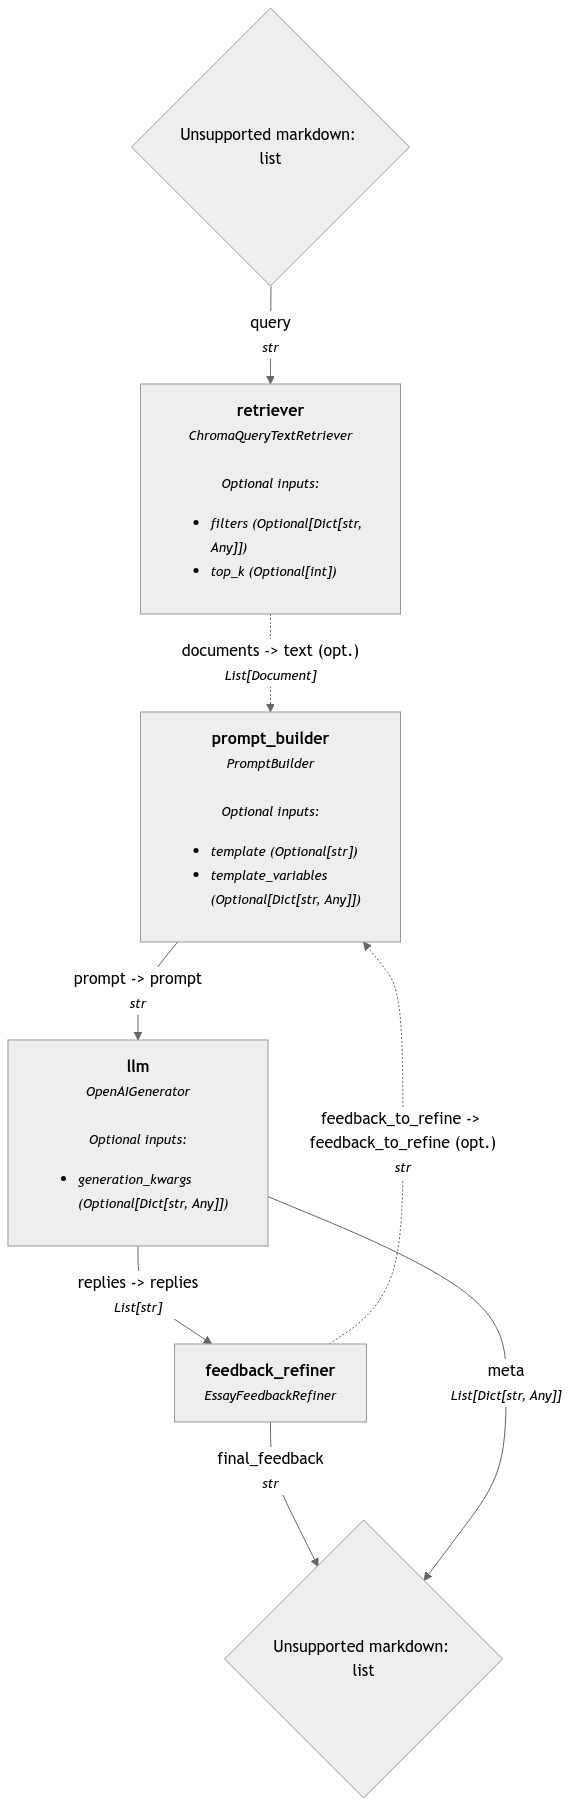

In [ ]:
grading_pipeline.show()